In [ ]:
# Cell 1: Upload your Kaggle API token
from google.colab import files
files.upload('')  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohamtolwala","key":"e4532bc8b9072bb373c888e0657ef0c4"}'}

In [ ]:
# Cell 2: Setup Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Cell 3: Download the Waterbirds dataset
!kaggle datasets download -d bahardibaie/waterbird
!unzip waterbird.zip -d waterbirds_data

Streaming output truncated to the last 5000 lines.
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0001_110632.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0002_110606.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0003_110672.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0005_110911.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0008_110536.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0009_797256.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0010_797262.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0014_797248.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_color

### gradcams erm/irm

In [ ]:
! pip install -q grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s 

Using device: cuda


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


Detected 1-class classifier from checkpoint
✅ Successfully loaded model with 1-class head
Waterbirds on land: 642 samples
Landbirds on water: 2255 samples

ANALYZING WORST-GROUP SAMPLES

--- GROUP 1: Waterbirds on Land ---

Processing: 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg
True label: 1 (Waterbird), Background: 0 (Land)
Error generating Grad-CAM: index 1 is out of bounds for dimension 0 with size 1
Input tensor shape: torch.Size([1, 3, 224, 224])

Processing: 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg
True label: 1 (Waterbird), Background: 0 (Land)
Error generating Grad-CAM: index 1 is out of bounds for dimension 0 with size 1
Input tensor shape: torch.Size([1, 3, 224, 224])

--- GROUP 2: Landbirds on Water ---

Processing: 004.Groove_billed_Ani/Groove_Billed_Ani_0094_1540.jpg
True label: 0 (Landbird), Background: 1 (Water)


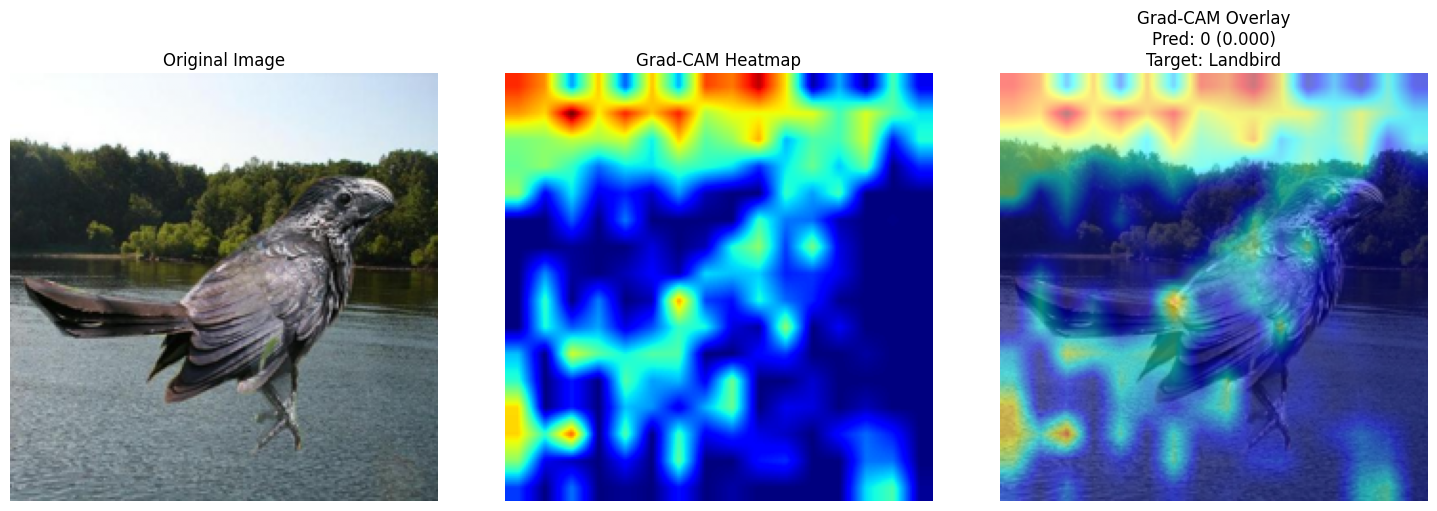


Processing: 004.Groove_billed_Ani/Groove_Billed_Ani_0037_1560.jpg
True label: 0 (Landbird), Background: 1 (Water)


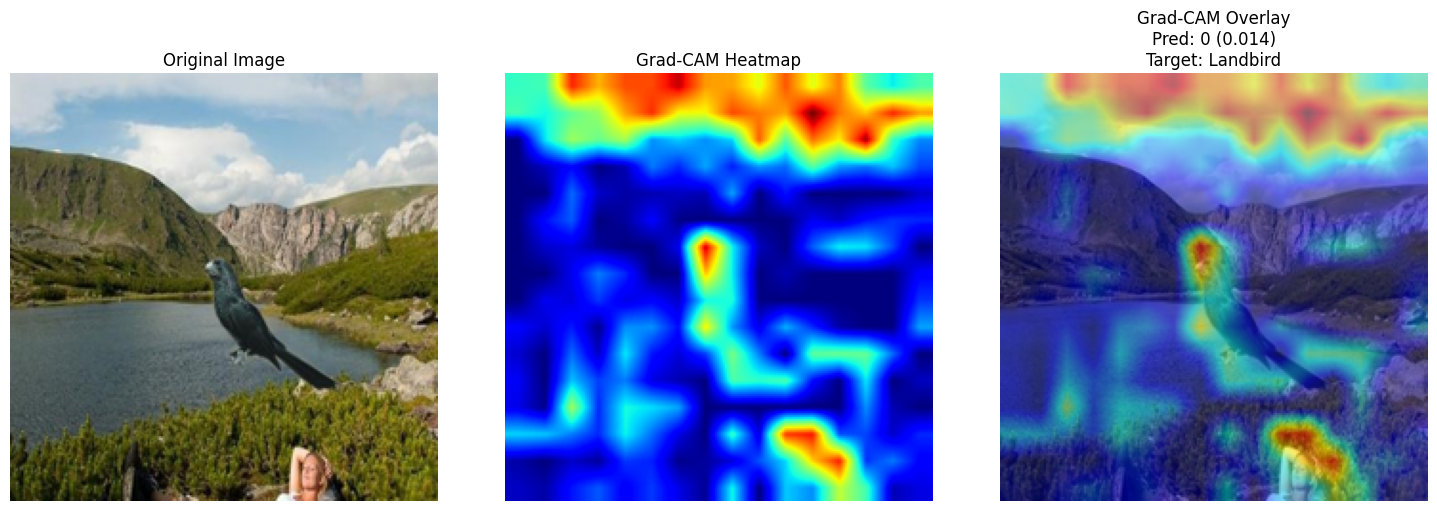


SUMMARY
File: 004.Groove_billed_Ani/Groove_Billed_Ani_0094_1540.jpg
  True: 0, Pred: 0 (0.000)
  Group: landbird_on_water

File: 004.Groove_billed_Ani/Groove_Billed_Ani_0037_1560.jpg
  True: 0, Pred: 0 (0.014)
  Group: landbird_on_water



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import cv2
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torchvision.transforms as transforms


class InvertedLogitWrapper(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model

        # Expose backbone and head so Grad-CAM can still hook into them
        self.backbone = model.backbone
        self.head = model.head

    def forward(self, x):
        return -self.model(x)



class DINOv2GradCAMWrapper(nn.Module):
    """
    Wrapper for DINOv2 + linear head that makes Grad-CAM work properly
    Supports both binary (1-class) and multi-class (2-class) outputs
    """
    def __init__(self, backbone, head, num_classes=1):
        super().__init__()
        self.backbone = backbone
        self.head = head
        self.num_classes = num_classes

    def forward(self, x):
        # Get features from backbone
        features = self.backbone.forward_features(x)
        # Extract CLS token
        cls_token = features["x_norm_clstoken"]  # [B, 384]
        # Pass through head
        logits = self.head(cls_token)  # [B, num_classes]

        # For 2-class case, we need to return class probabilities
        # For compatibility with Grad-CAM targeting
        if self.num_classes == 2:
            # Return logits directly for 2-class case
            return logits
        else:
            # Return logits for 1-class binary case
            return logits

def reshape_transform_dinov2(tensor, height=16, width=16):
    """
    Reshape transform for DINOv2 ViT-S/14
    Input: tensor of shape [batch_size, num_patches + 1, hidden_dim]
    Output: tensor of shape [batch_size, hidden_dim, height, width]
    """
    # Remove CLS token (first token)
    if tensor.dim() == 3:
        tensor = tensor[:, 1:, :]  # Remove CLS token

    # Reshape patch tokens to spatial grid
    batch_size, num_patches, hidden_dim = tensor.shape

    # For ViT-S/14: 224/14 = 16, so we have 16x16 patches
    assert num_patches == height * width, f"Expected {height*width} patches, got {num_patches}"

    # Reshape to [batch_size, height, width, hidden_dim] then permute
    result = tensor.reshape(batch_size, height, width, hidden_dim)
    result = result.permute(0, 3, 1, 2)  # [batch_size, hidden_dim, height, width]

    return result

class DINOv2GradCAMVisualizer:
    def __init__(self, model_path, device='cuda'):
        self.device = device
        self.model = self._load_model(model_path)
        self.transform = self._get_transform()

    def _load_model(self, model_path):
        """Load the trained DINOv2 model"""
        # Load backbone
        backbone = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14")

        # Load trained weights first to check dimensions
        checkpoint = torch.load(model_path, map_location=self.device)

        # Handle different checkpoint formats
        if 'model_state_dict' in checkpoint:
            state_dict = checkpoint['model_state_dict']
        elif 'state_dict' in checkpoint:
            state_dict = checkpoint['state_dict']
        else:
            state_dict = checkpoint

        # Auto-detect number of classes from head weight shape
        if 'head.weight' in state_dict:
            num_classes = state_dict['head.weight'].shape[0]
            print(f"Detected {num_classes}-class classifier from checkpoint")
        else:
            # Try different possible key names
            head_keys = [k for k in state_dict.keys() if 'head' in k or 'classifier' in k or 'fc' in k]
            if head_keys:
                weight_key = [k for k in head_keys if 'weight' in k][0]
                num_classes = state_dict[weight_key].shape[0]
                print(f"Detected {num_classes}-class classifier from key: {weight_key}")
            else:
                print("Warning: Could not detect classifier shape, assuming binary (1-class)")
                num_classes = 1

        # Create head with correct dimensions
        head = nn.Linear(384, num_classes)  # DINOv2-S has 384 features

        # Wrap model
        model = DINOv2GradCAMWrapper(backbone, head, num_classes=num_classes)

        # Load state dict
        try:
            model.load_state_dict(state_dict, strict=False)
            print(f"✅ Successfully loaded model with {num_classes}-class head")
        except Exception as e:
            print(f"❌ Error loading state dict: {e}")
            print("Available keys in checkpoint:", list(state_dict.keys()))
            raise e

        model = model.to(self.device)
        model.eval()

        # ✅ Insert here
        # model = InvertedLogitWrapper(model)

        return model

    def _get_transform(self):
        """Get preprocessing transform for DINOv2"""
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

    def load_image(self, img_path):
        """Load and preprocess image"""
        image = Image.open(img_path).convert('RGB')

        # Keep original for visualization
        original_image = np.array(image.resize((224, 224))) / 255.0

        # Preprocess for model
        input_tensor = self.transform(image).unsqueeze(0).to(self.device)

        return input_tensor, original_image

    def generate_gradcam(self, input_tensor, target_class=None, layer_name='blocks.-2.norm1'):
        """Generate Grad-CAM heatmap"""
        # Define target layers - we'll hook into the second-to-last transformer block
        if layer_name == 'blocks.-2.norm1':
            target_layers = [self.model.backbone.blocks[-2].norm1]
        elif layer_name == 'blocks.-1.norm1':
            target_layers = [self.model.backbone.blocks[-1].norm1]
        elif layer_name == 'blocks.-2.attn':
            target_layers = [self.model.backbone.blocks[-2].attn]
        else:
            # Default to second-to-last norm layer
            target_layers = [self.model.backbone.blocks[-2].norm1]

        # Create GradCAM object
        cam = GradCAM(
            model=self.model,
            target_layers=target_layers,
            reshape_transform=reshape_transform_dinov2
        )

        # Handle target class based on model type
        if target_class is not None:
            targets = [ClassifierOutputTarget(target_class)]
        else:
            # Auto-detect predicted class based on model output format
            with torch.no_grad():
                output = self.model(input_tensor)
                if output.shape[1] == 2:  # 2-class case
                    predicted_class = int(torch.argmax(output, dim=1))
                else:  # 1-class binary case
                    predicted_class = int(torch.sigmoid(output) > 0.5)
            targets = [ClassifierOutputTarget(predicted_class)]

        # Generate CAM
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

        # Return the first (and only) image's CAM
        return grayscale_cam[0, :]

    def visualize_gradcam(self, img_path, target_class=None, layer_name='blocks.-2.norm1',
                         save_path=None, show_plot=True):
        """Complete pipeline to visualize Grad-CAM"""
        # Load image
        input_tensor, original_image = self.load_image(img_path)

        # Get model prediction
        with torch.no_grad():
            output = self.model(input_tensor)
            if output.shape[1] == 2:  # 2-class case
                prediction_probs = torch.softmax(output, dim=1)
                prediction_prob = prediction_probs[0, 1].item()  # Probability of class 1
                predicted_class = int(torch.argmax(output, dim=1))
            else:  # 1-class binary case
                prediction_prob = torch.sigmoid(output).item()
                predicted_class = int(prediction_prob > 0.5)

        # Generate Grad-CAM
        try:
            grayscale_cam = self.generate_gradcam(input_tensor, target_class, layer_name)

            # Create visualization
            visualization = show_cam_on_image(original_image, grayscale_cam, use_rgb=True)

            if show_plot:
                # Plot results
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                # Original image
                axes[0].imshow(original_image)
                axes[0].set_title('Original Image')
                axes[0].axis('off')

                # Heatmap
                axes[1].imshow(grayscale_cam, cmap='jet')
                axes[1].set_title('Grad-CAM Heatmap')
                axes[1].axis('off')

                # Overlay
                axes[2].imshow(visualization)
                target_used = target_class if target_class is not None else predicted_class
                class_name = "Waterbird" if target_used == 1 else "Landbird"
                axes[2].set_title(f'Grad-CAM Overlay\nPred: {predicted_class} ({prediction_prob:.3f})\nTarget: {class_name}')
                axes[2].axis('off')

                plt.tight_layout()

                if save_path:
                    plt.savefig(save_path, dpi=150, bbox_inches='tight')

                plt.show()

            return {
                'original_image': original_image,
                'heatmap': grayscale_cam,
                'visualization': visualization,
                'prediction': predicted_class,
                'prediction_prob': prediction_prob
            }

        except Exception as e:
            print(f"Error generating Grad-CAM: {str(e)}")
            print(f"Input tensor shape: {input_tensor.shape}")
            return None

def analyze_worst_group_samples(model_path, data_root, metadata_csv, device='cuda'):
    """
    Analyze worst-group samples from Waterbirds dataset
    """
    # Initialize visualizer
    visualizer = DINOv2GradCAMVisualizer(model_path, device)

    # Load metadata
    df = pd.read_csv(metadata_csv)

    # Filter test set
    test_df = df[df['split'] == 2].copy()

    # Identify worst-group samples
    # Group 1: Waterbirds on land (y=1, place=0)
    waterbird_on_land = test_df[(test_df['y'] == 1) & (test_df['place'] == 0)]

    # Group 2: Landbirds on water (y=0, place=1)
    landbird_on_water = test_df[(test_df['y'] == 0) & (test_df['place'] == 1)]

    print(f"Waterbirds on land: {len(waterbird_on_land)} samples")
    print(f"Landbirds on water: {len(landbird_on_water)} samples")

    # Sample 2 from each group
    samples_group1 = waterbird_on_land.head(2)
    samples_group2 = landbird_on_water.head(2)

    results = []

    print("\n" + "="*50)
    print("ANALYZING WORST-GROUP SAMPLES")
    print("="*50)

    # Process Group 1: Waterbirds on land
    print(f"\n--- GROUP 1: Waterbirds on Land ---")
    for idx, row in samples_group1.iterrows():
        img_path = f"{data_root}/{row['img_filename']}"
        print(f"\nProcessing: {row['img_filename']}")
        print(f"True label: {row['y']} (Waterbird), Background: {row['place']} (Land)")

        result = visualizer.visualize_gradcam(
            img_path,
            target_class=int(row['y']),  # Use true class
            layer_name='blocks.-2.norm1',
            save_path=f"gradcam_waterbird_land_{idx}.png"
        )

        if result:
            results.append({
                'filename': row['img_filename'],
                'true_label': row['y'],
                'background': row['place'],
                'prediction': result['prediction'],
                'prediction_prob': result['prediction_prob'],
                'group': 'waterbird_on_land'
            })

    # Process Group 2: Landbirds on water
    print(f"\n--- GROUP 2: Landbirds on Water ---")
    for idx, row in samples_group2.iterrows():
        img_path = f"{data_root}/{row['img_filename']}"
        print(f"\nProcessing: {row['img_filename']}")
        print(f"True label: {row['y']} (Landbird), Background: {row['place']} (Water)")

        result = visualizer.visualize_gradcam(
            img_path,
            target_class=int(row['y']),  # Use true class
            layer_name='blocks.-2.norm1',
            save_path=f"gradcam_landbird_water_{idx}.png"
        )

        if result:
            results.append({
                'filename': row['img_filename'],
                'true_label': row['y'],
                'background': row['place'],
                'prediction': result['prediction'],
                'prediction_prob': result['prediction_prob'],
                'group': 'landbird_on_water'
            })

    return results, visualizer

# Example usage
if __name__ == "__main__":
    # Configuration
    # MODEL_PATH = "/content/erm_dinov2_linear_kaggle.pth"  # Update this path
    MODEL_PATH = "/content/raman_irm_dinov2_linear_ramp250.pth"  # Update this path
    DATA_ROOT = "/content/waterbirds_data/waterbird"
    METADATA_CSV = "/content/waterbirds_data/waterbird/metadata.csv"
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

    print(f"Using device: {DEVICE}")

    # Run analysis
    try:
        results, visualizer = analyze_worst_group_samples(
            MODEL_PATH, DATA_ROOT, METADATA_CSV, DEVICE
        )

        print(f"\n" + "="*50)
        print("SUMMARY")
        print("="*50)
        for result in results:
            print(f"File: {result['filename']}")
            print(f"  True: {result['true_label']}, Pred: {result['prediction']} ({result['prediction_prob']:.3f})")
            print(f"  Group: {result['group']}")
            print()

    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()

    # Example of single image analysis
    # single_result = visualizer.visualize_gradcam(
    #     "/path/to/single/image.jpg",
    #     target_class=1,  # Or None for predicted class
    #     layer_name='blocks.-2.norm1'
    # )

In [ ]:
# Example of single image analysis
single_result = visualizer.visualize_gradcam(
        "/content/waterbirds_data/waterbird/044.Frigatebird/Frigatebird_0063_42812.jpg",
        target_class=1,  # Or None for predicted class
        layer_name='blocks.-2.norm1'
    )

Error generating Grad-CAM: index 1 is out of bounds for dimension 0 with size 1
Input tensor shape: torch.Size([1, 3, 224, 224])


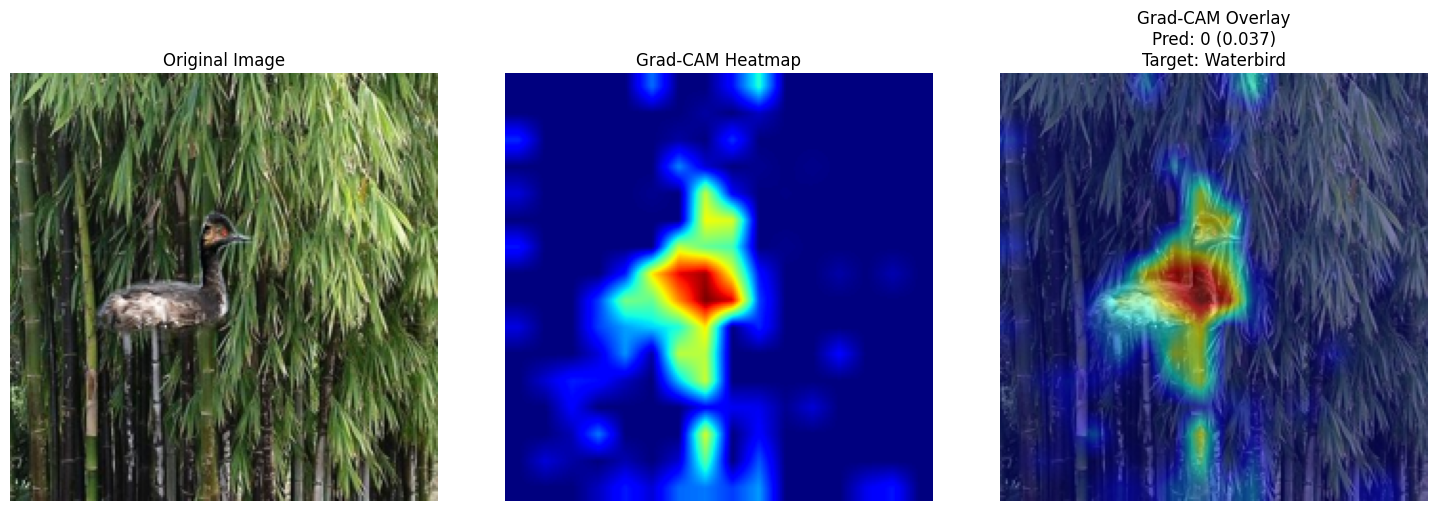

In [ ]:
single_result = visualizer.visualize_gradcam(
    "/content/waterbirds_data/waterbird/044.Frigatebird/Frigatebird_0063_42812.jpg",
    target_class=1,
    layer_name='blocks.-2.norm1'
)


In [ ]:
def analyze_selected_samples_dual_model(
    irm_model_path,
    erm_model_path,
    selected_img_paths,
    data_root,
    device='cuda',
    layer_name='blocks.-2.norm1',
    save_prefix='gradcam_selected'
):
    print(f"Analyzing {len(selected_img_paths)} samples on IRM and ERM models")

    # --- Load IRM model with inversion ---
    irm_vis = DINOv2GradCAMVisualizer(irm_model_path, device)
    irm_vis.model = InvertedLogitWrapper(irm_vis.model)  # wrap for waterbird class activation

    # --- Load ERM model normally ---
    erm_vis = DINOv2GradCAMVisualizer(erm_model_path, device)

    results = []

    for i, img_rel_path in enumerate(selected_img_paths):
        img_path = os.path.join(data_root, img_rel_path)
        print(f"\n[{i+1}] Processing: {img_rel_path}")

        # ----- IRM Model -----
        irm_result = irm_vis.visualize_gradcam(
            img_path,
            target_class=0,  # for waterbird activation via logit inversion
            layer_name=layer_name,
            save_path=f"{save_prefix}_irm_{i}.png"
        )

        # ----- ERM Model -----
        erm_result = erm_vis.visualize_gradcam(
            img_path,
            target_class=0,  # landbird (actual logit), or use predicted class
            layer_name=layer_name,
            save_path=f"{save_prefix}_erm_{i}.png"
        )

        results.append({
            'img_path': img_rel_path,
            'irm_pred': irm_result['prediction'] if irm_result else None,
            'erm_pred': erm_result['prediction'] if erm_result else None,
            'irm_prob': irm_result['prediction_prob'] if irm_result else None,
            'erm_prob': erm_result['prediction_prob'] if erm_result else None,
        })

    return results


Analyzing 2 samples on IRM and ERM models


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


Detected 1-class classifier from checkpoint
✅ Successfully loaded model with 1-class head


Using cache found in /root/.cache/torch/hub/facebookresearch_dinov2_main


Detected 2-class classifier from checkpoint
✅ Successfully loaded model with 2-class head

[1] Processing: /content/waterbirds_data/waterbird/144.Common_Tern/Common_Tern_0044_148680.jpg


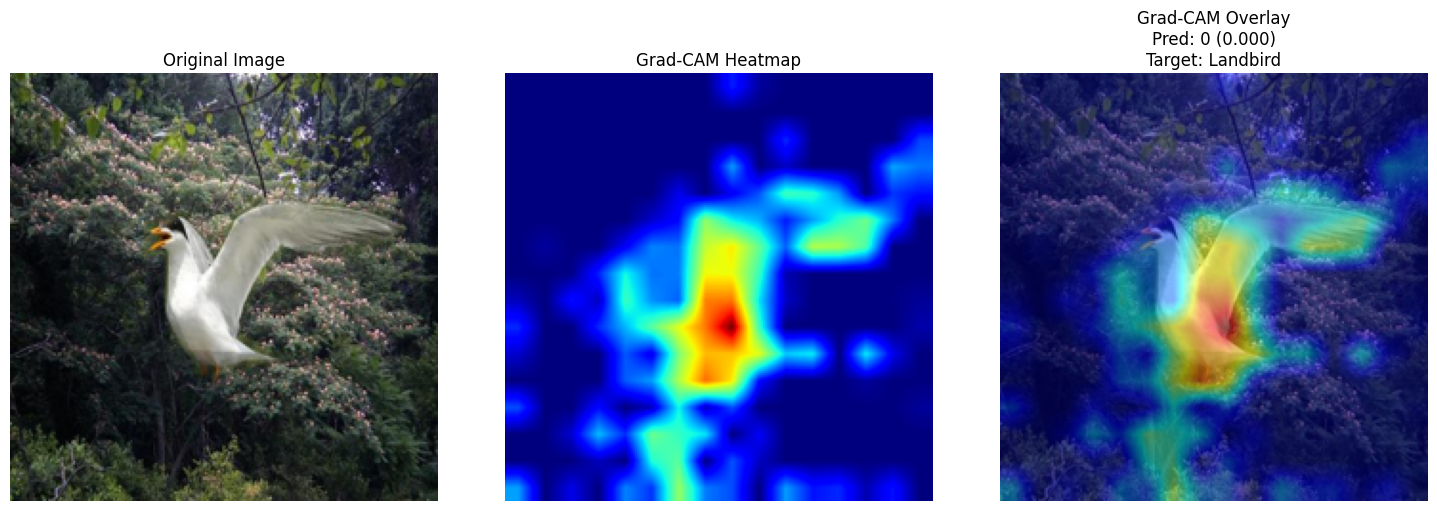

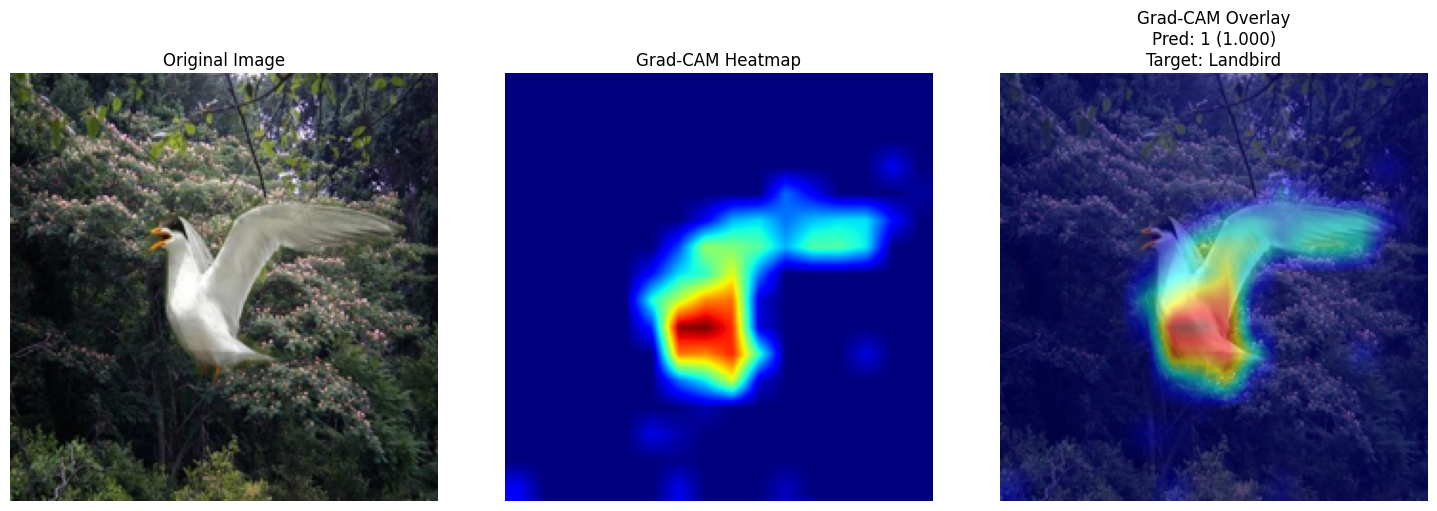


[2] Processing: /content/waterbirds_data/waterbird/090.Red_breasted_Merganser/Red_Breasted_Merganser_0043_79295.jpg


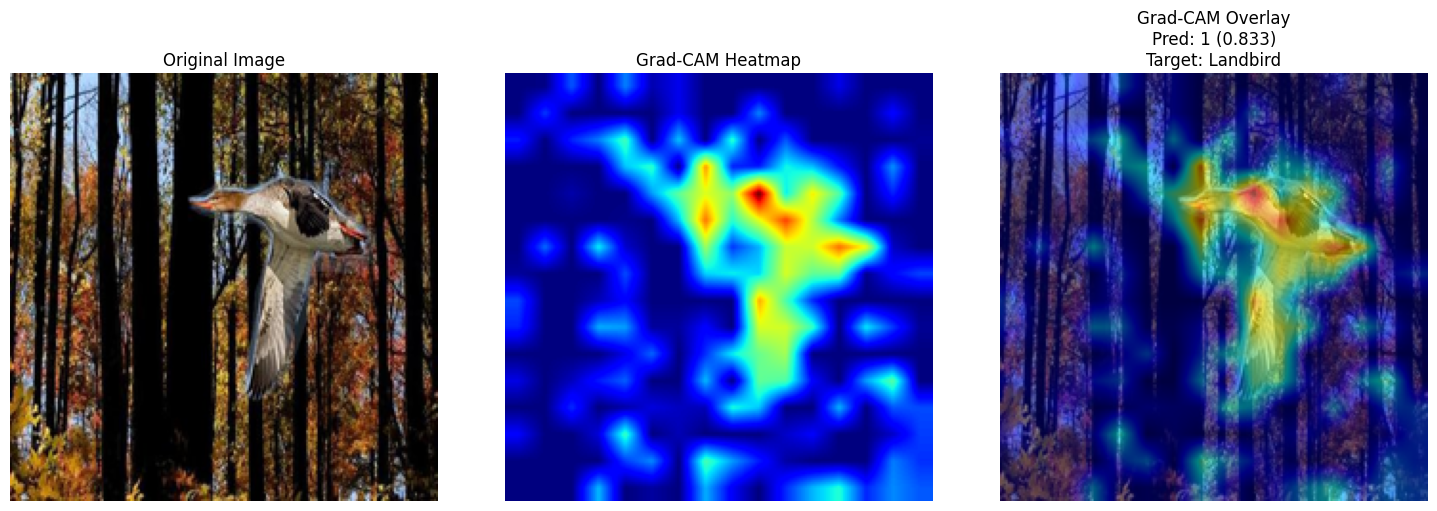

In [ ]:
import os

# List of hand-picked image paths (relative to data root)
selected_paths = [
    "/content/waterbirds_data/waterbird/144.Common_Tern/Common_Tern_0044_148680.jpg",
    "/content/waterbirds_data/waterbird/090.Red_breasted_Merganser/Red_Breasted_Merganser_0043_79295.jpg"
]

# Config
IRM_PATH = "/content/raman_irm_dinov2_linear_ramp250.pth"
ERM_PATH = "/content/erm_dinov2_linear_kaggle.pth"
DATA_ROOT = "/content/waterbirds_data/waterbird"
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Run analysis
results = analyze_selected_samples_dual_model(
    irm_model_path=IRM_PATH,
    erm_model_path=ERM_PATH,
    selected_img_paths=selected_paths,
    data_root=DATA_ROOT,
    device=DEVICE,
    save_prefix="gradcam_handpicked"
)
